In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as statistics

###### Plotting a line chart from a dataframe

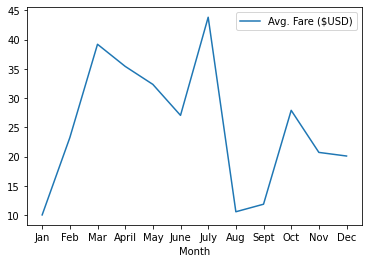

In [18]:
# Dependencies
import pandas as pd

# Store filepath in a variable
file_one = "Resources/PyBer_ride_data.csv"

# Read the data file
pyber_ride_df = pd.read_csv(file_one)

# Show just the header
pyber_ride_df.head()

# Set x-axis and tick locations.
x_axis = np.arange(len(pyber_ride_df))
tick_locations = [value for value in x_axis]
# Plot the data.
pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)")
plt.xticks(tick_locations, pyber_ride_df["Month"])
plt.show()




###### Plotting a barchart from a dataframe

0     10.02
1     23.24
2     39.20
3     35.42
4     32.34
5     27.04
6     43.82
7     10.56
8     11.85
9     27.90
10    20.71
11    20.09
Name: Avg. Fare ($USD), dtype: float64


([<matplotlib.axis.YTick at 0x1aea7915e08>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

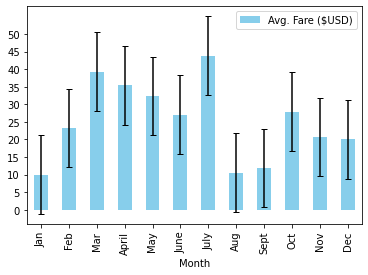

In [50]:
# Dependencies
import pandas as pd

# Store filepath in a variable
file_one = "Resources/PyBer_ride_data.csv"
# Read the data file
pyber_ride_df = pd.read_csv(file_one)
# Show just the header
pyber_ride_df.head()

# Set x-axis and tick locations.
x_axis = np.arange(len(pyber_ride_df))
# y_axis = pyber_ride_df["Avg. Fare ($USD)"]
y_axis = pyber_ride_df.iloc[:,1]
print(y_axis)
tick_locations = [value for value in x_axis]
# #Get stdev to use in errorbar
stdev = statistics.stdev(y_axis)
stdev
# # Plot the data.

pyber_ride_df.plot.bar(x="Month", y="Avg. Fare ($USD)", color = "skyblue", yerr=stdev, capsize=3)
plt.yticks(np.arange(0, 55, step=5)) 

# # Create a list indicating where to write x labels and set figure size to adjust for space
# plt.figure(figsize=(20,3)),
# plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
# plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

# # Set x and y limits
# plt.xlim(-0.75, len(x_axis))
# plt.ylim(0, max(rain_df["Inches"])+10)

# # Set a Title and labels
# plt.title("Average Rain per State")
# plt.xlabel("State")
# plt.ylabel("Average Amount of Rainfall in Inches")

# # Save our graph and show the grap
# plt.tight_layout()
# plt.savefig("./Images/avg_state_rain.png")
# plt.show()



In [77]:
#Part 1
# Add Matplotlib inline magic command
%matplotlib inline
#Declare dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as statistics
# Import your data into a Pandas DataFrame.
# Store filepaths in variables
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"
# Read the data files
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# # ride_data_df.isnull().sum() #check for null values - none found
# ride_data_df.count()  #get count of columns and find out if any are null  count is 2375
# ride_data_df.dtypes #get the data type of each column fare = float, ride_id = int, city and date=object
# # ride_data_df["city"].unique() #shows an array of all the unique city names

# city_data_df.isnull().sum() #check for null values - none found
# city_data_df.count()  #get count of columns and find out if any are null count is 120
city_data_df.dtypes #get the data type of each column  city and type are object, driver_count is int
# city_data_df["type"].unique() #shows an array of all the unique city types

city            object
driver_count     int64
type            object
dtype: object

In [81]:
#Part 2
# print(sum(city_data_df["type"]=="Suburban"))
# print(sum(city_data_df["type"]=="Urban"))
# print(sum(city_data_df["type"]=="Rural"))

# Merge your DataFrames.
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
# Display the DataFrame
pyber_data_df.head()
# Create a bubble chart that showcases the average fare versus the total number of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.
# Determine the mean, median, and mode for the following:
# The total number of rides for each city type.
# The average fares for each city type.
# The total number of drivers for each city type.
# Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
# The number of rides for each city type.
# The fares for each city type.
# The number of drivers for each city type.
# Create a pie chart that visualizes each of the following data for each city type:
# The percent of total fares.
# The percent of total rides.
# The percent of total drivers.

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


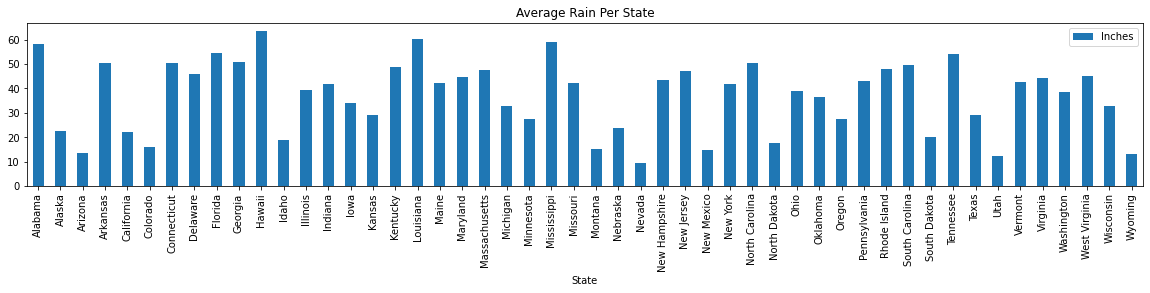

<Figure size 432x288 with 0 Axes>

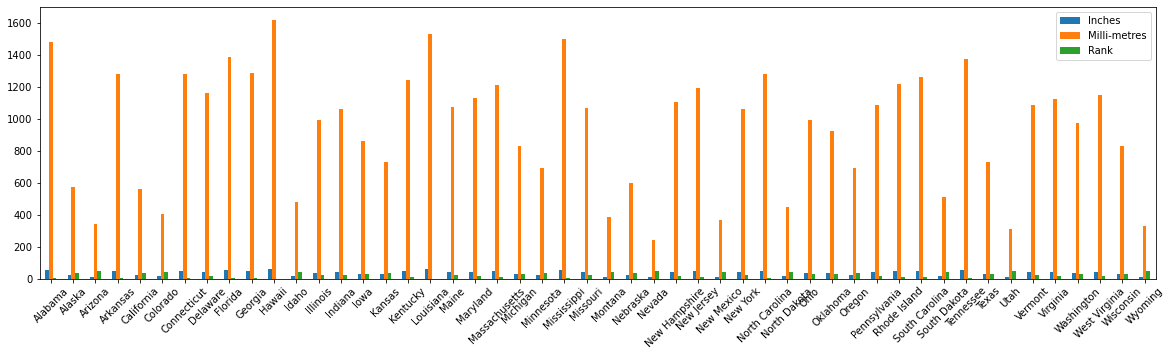

<Figure size 432x288 with 0 Axes>

In [30]:
# Using Pandas to Chart a DataFrame

# Load in csv
rain_df = pd.read_csv("./Resources/avg_rain_state.csv")
rain_df.head()

# Filter the DataFrame down only to those columns to chart
state_and_inches = rain_df[["State","Inches"]]

# Set the index to be "State" so they will be used as labels
state_and_inches = state_and_inches.set_index("State")

state_and_inches.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_and_inches.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Rain Per State")

plt.show()
plt.tight_layout()

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = rain_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(rain_df["State"], rotation=45)

plt.show()
plt.tight_layout()

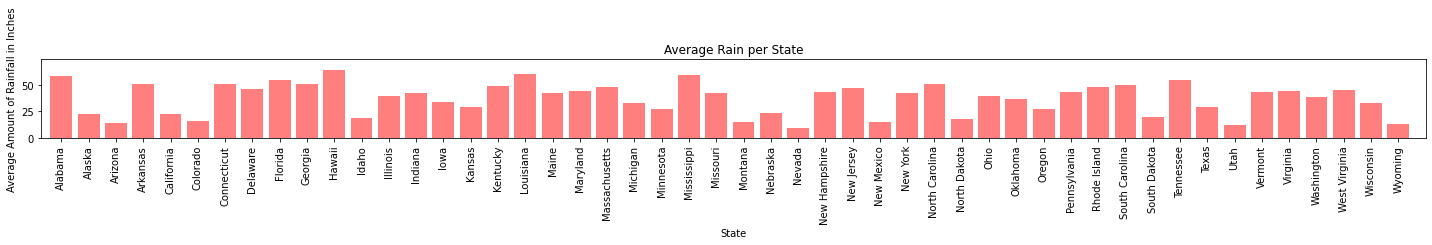

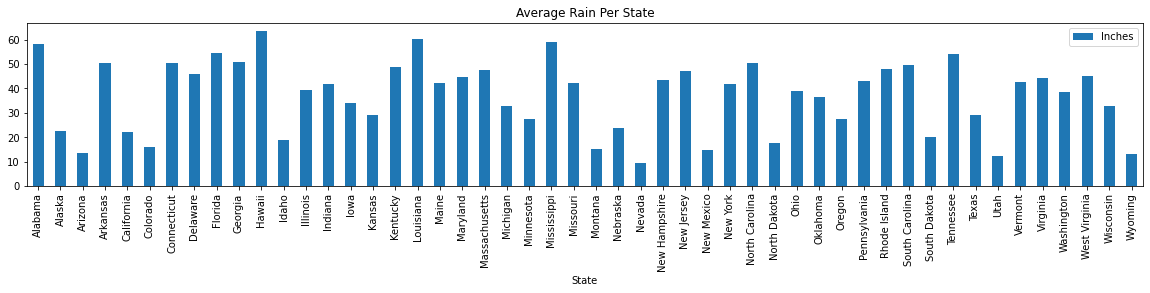

<Figure size 432x288 with 0 Axes>

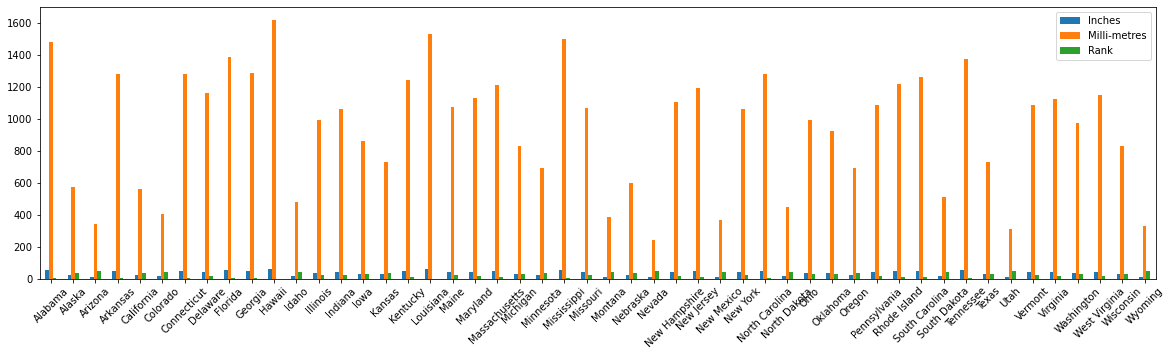

<Figure size 432x288 with 0 Axes>

In [29]:
## Using MatplotLib to Chart a DataFrame

# Load in csv
rain_df = pd.read_csv("./Resources/avg_rain_state.csv")
rain_df.head()

# Set x axis and tick locations
x_axis = np.arange(len(rain_df))
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,3))
plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(rain_df["Inches"])+10)

# Set a Title and labels
plt.title("Average Rain per State")
plt.xlabel("State")
plt.ylabel("Average Amount of Rainfall in Inches")

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("./Images/avg_state_rain.png")
plt.show()

# Using Pandas to Chart a DataFrame
# Filter the DataFrame down only to those columns to chart
state_and_inches = rain_df[["State","Inches"]]

# Set the index to be "State" so they will be used as labels
state_and_inches = state_and_inches.set_index("State")

state_and_inches.head()

# Use DataFrame.plot() in order to create a bar chart of the data
state_and_inches.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Rain Per State")

plt.show()
plt.tight_layout()

# Pandas can also plot multiple columns if the DataFrame includes them
multi_plot = rain_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(rain_df["State"], rotation=45)

plt.show()
plt.tight_layout()


In [ ]:
###### Things to do with dataframes

In [ ]:
# Store filepath in a variable
file_one = "Resources/PyBer_ride_data.csv"

# Read the data file
file_one_df = pd.read_csv(file_one, encoding="ISO-8859-1")

# Show just the header
file_one_df.head()

# # Show a single column
# file_one_df["first_name"].head()

# # Show mulitple specific columns--note the extra brackets
# file_one_df[["first_name", "email"]].head()

# # Export file as a CSV, without the Pandas index, but with the header
# file_one_df.to_csv("Output/fileOne.csv", index=False, header=True)

###### Basic formatting
#Error bars with caps
#Line example
    #ax.plot(x_axis, y_axis, color = "green", linewidth= 2, marker = "o",label= "Boston")  
#Bar example
#Scatter example 
    ax.scatter(y_axis, x_axis, s = [i * 5 for i in y_axis], color = "skyblue", label='Boston', alpha=.8, edgecolors="k",
          linewidths=2)       
#Pie example
#Labeling and rotating
    plt.xlabel("Date")
    plt.ylabel("Fare($)")
    plt.title("PyBer Fare by Month")
    plt.legend()
#Ticking
#Error Bars with caps

 